# **Final Project Kelompok 5 - Yuk Liburan** #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Travel.xlsx')
df = data.copy()
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## **Descriptive Statistics** ##

In [3]:
# Pengecekan jumlah kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Hasil observasi:**

Kolom `Age`, `DurationOfPitch`, `NumberOfTrips`, dan `MonthlyIncome` memiliki missing values yang cukup banyak, yaitu > 100 baris. Selain itu kolom `TypeofContact`, `NumberOfFollowups`, `PreferredPropertyStar`, dan `NumberOfChildrenVisiting` juga memiliki missing values tetapi jumlahnya lebih sedikit.

In [4]:
# Pengelompokan kolom berdasarkan jenisnya: kategorikal & numerik
nums = ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
        'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']
cats = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus','Designation']

In [5]:
# Ringkasan statistik dari kolom numerikal
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


**Hasil observasi:**

1. Kolom - kolom sekilas tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh).
2. Kolom `MonthlyIncome` tampaknya skewed ke kanan.
3. Kolom `ProdTaken`, `Passport`, dan `OwnCar` ternyata bernilai boolean/binary.
4. Kolom `PreferredPropertyStar`, dan `PitchSatisfactionScore` merupakan kolom rating.
5. Kolom `CityTier` merupakan kolom kategori yang berbentuk integer, dugaan sementara merupakan kolom klasifikasi/kategori dari kota-kota tertentu.

In [6]:
# Ringkasan statistik dari kolom kategorikal
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [7]:
# Melihat nilai-nilai dari kolom kategorikal
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



**Hasil observasi:**

1. Pada kolom `TypeofContact` nilainya dinominasi oleh kategori Self Enquiry.
2. Pada kolom `ProductPitched` menunjukan bahwa produk Basic menempati pilihan terbanyak.
3. Pada kolom `Designation` menunjukan bahwa klasifikasi user Executive dan Manager merupakan user yang dominan.
4. Pada kolom `Designation` user dengan tipe pekerjaan Salaried memiliki jumlah terbanyak.
5. Pada kolom `MaritalStatus` jumlah yang terbanyak berasal dari kategori Married.
6. Pada kolom `MaritalStatus` terdapat nilai yang memiliki arti yang sama, yaitu Single dan Unmarried sehingga akan lebih baik jika dikelompokan menjadi satu dalam kategori Single.
7. Pada kolom `Gender` terdapat 3 nilai yaitu Male, Female dan Fe Male. Nilai Fe Male merupakan nilai yang ambigu, oleh karena itu sebaiknya diubah menjadi Female.

## **Univariate Analysis dan Distribusi Setiap Features terhadap Variabel Target** ##

In [8]:
rcParams['figure.figsize'] = 14, 20
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

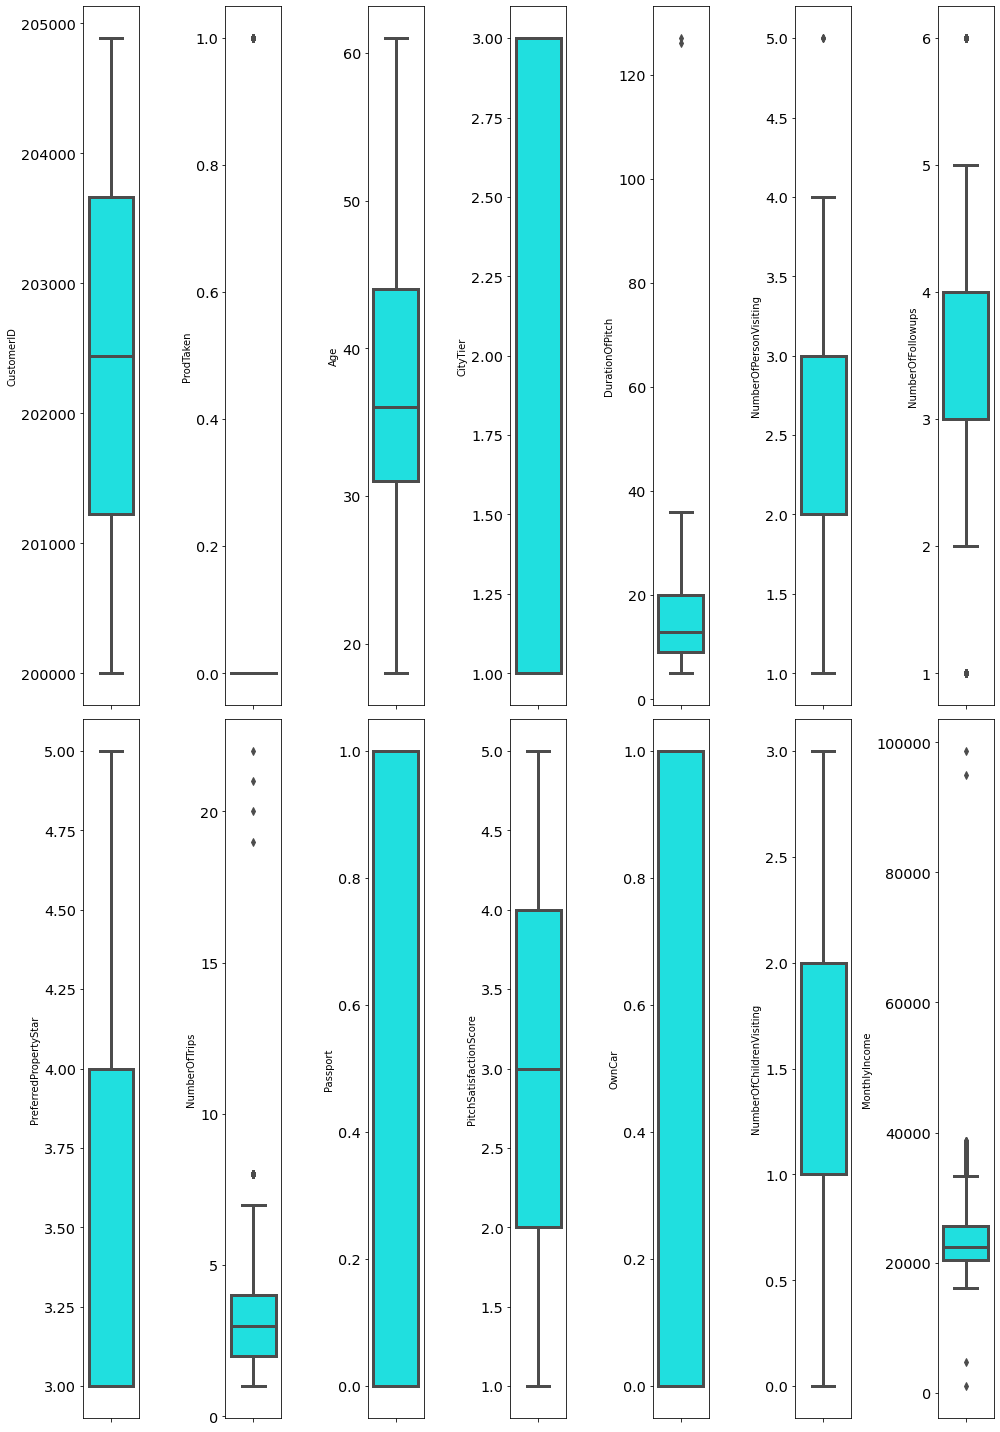

In [9]:
# Analisis univariat menggunakan boxplot terhadap variabel numerik untuk melihat adanya sebaran outlier
features = nums
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)//2, i+1)
    sns.boxplot(y=df[features[i]], color='Cyan', orient='v')
    plt.tight_layout()
plt.savefig("outlier.jpg", dpi=150)

**Hasil observasi:**

Terdapat beberapa kolom yang memiliki outlier, antara lain `NumberOfTrips`, `MonthlyIncome`, `NumberOfFollowups`, `NumberOfPersonVisiting`, dan `DurationOfPitch`.

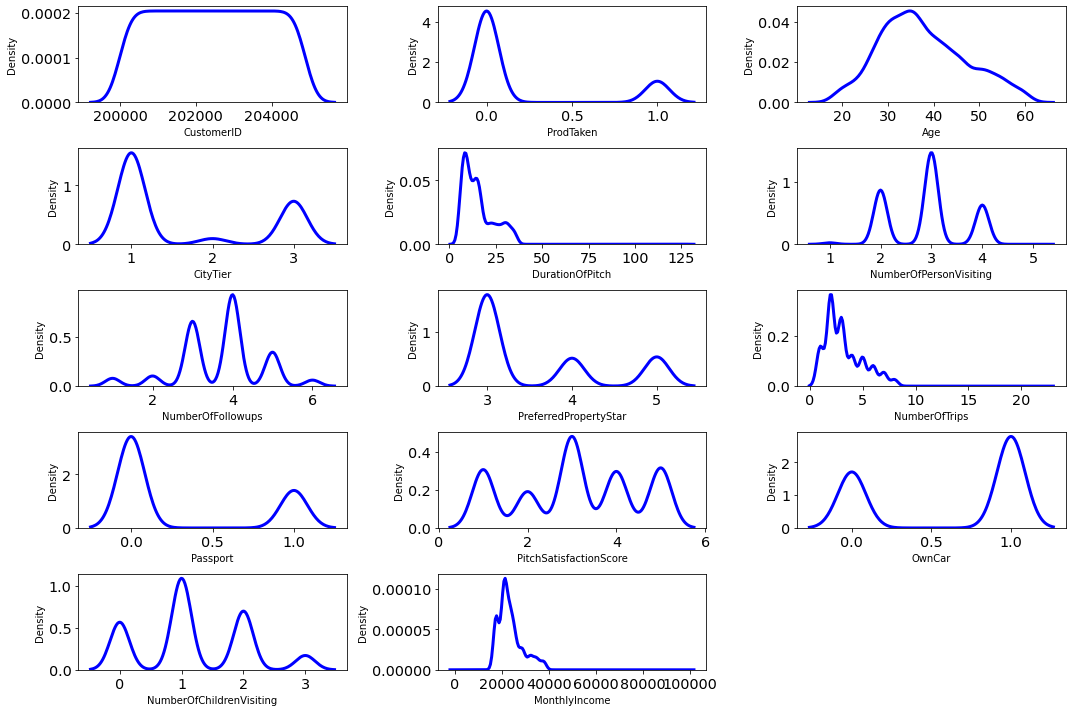

In [10]:
# Analisis univariat menggunakan histogram terhadap variabel numerikal untuk melihat distribusi simetris atau skew
features = nums
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)//4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()
plt.savefig("histogram.jpg", dpi=150)

In [11]:
# Melihat kesimetrisan dari variabel yang sejatinya adalah numerik dilihat dari variasi valuenya
print('skew umur:', df['Age'].skew())
print('skew DurationOfPitch:', df['DurationOfPitch'].skew())
print('skew MonthlyIncome:', df['MonthlyIncome'].skew())
print('standart deviasi MonthlyIncome:', df['MonthlyIncome'].std())

skew umur: 0.38298868373855377
skew DurationOfPitch: 1.7520370490349106
skew MonthlyIncome: 1.949159831766865
standart deviasi MonthlyIncome: 5380.698360691633


**Hasil observasi:**

1. Kolom `Age` memiliki distribusi mendekati normal atau simetris, bisa dilihat dari gambar dan hasil nilai skew yang mendekati 0 (0.38).
2. Kolom `DurationOfPitch` dan `MonthlyIncome` memiliki kecondongan positif (miring ke kanan) yaitu lebih terkonsentrasi di sebelah kiri dan ekor yang panjang di sisi kanan, hasil skew juga menunjukkan masing-masing nilainya berturut-turut adalah 1,75 dan 1,94.
3. Kolom `MonthlyIncome` memungkinkan untuk dilakukan normalisasi dikarenakan variasi pendapatannya cukup besar.
4. Kolom lain tidak begitu diperhatikan dikarenakan di antaranya adalah kolom bertipe ordinal dan nominal yang formatnya dibuat dalam bentuk numerik sehingga masih perlu dilakukan pada tahap preprocessing untuk Feature Encoding.

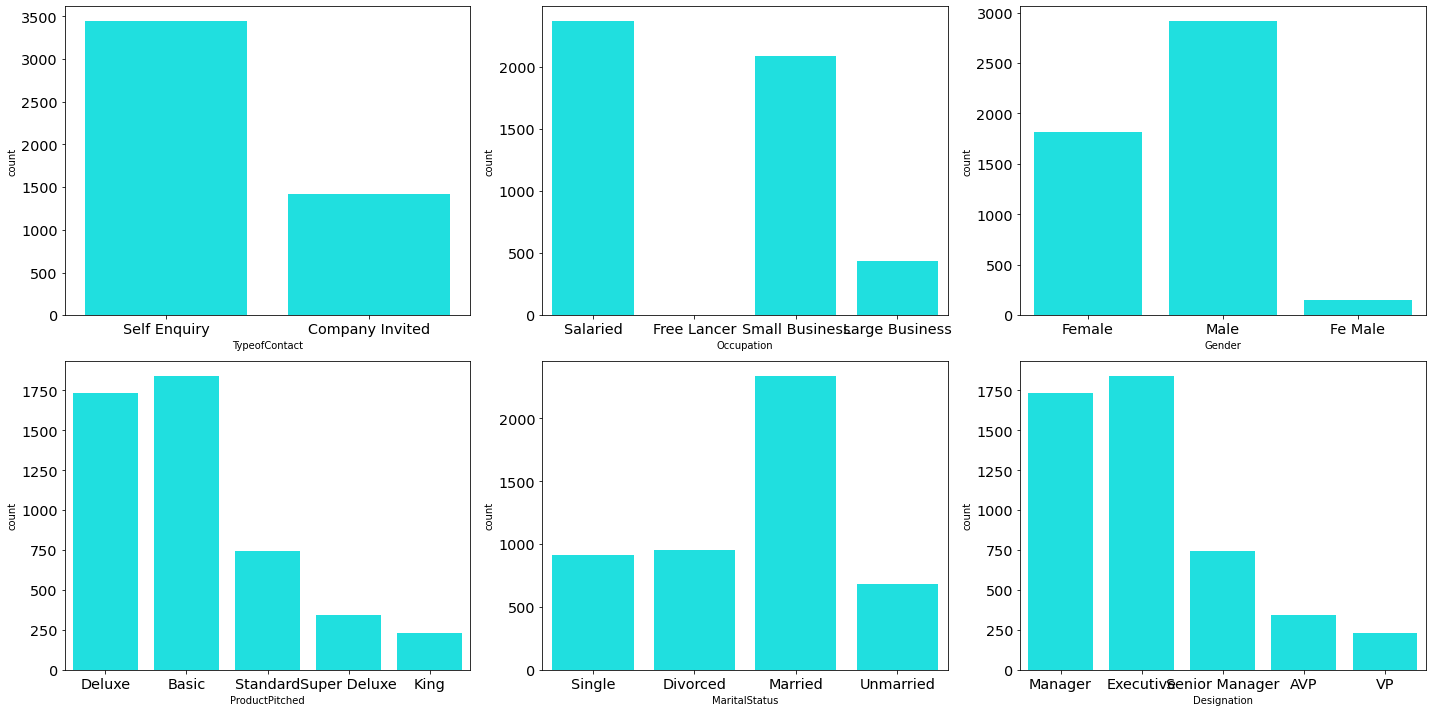

In [12]:
# Analisis univariat menggunakan count plot terhadap variabel kategorikal
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats[i]], color='Cyan', orient='v')
    plt.tight_layout()
plt.savefig("univariat plot.jpg", dpi=150)

**Hasil observasi:**

1. Kategori Self Enquiry pada kolom `TypeofContact` memiliki proporsi 2 kali lebih banyak daripada kategori Company Invited.
2. Pada kolom `Occupation` user paling banyak berasal dari kategori Salaried, sedangkan pada kategori Free Lancer tidak ada sama sekali.
3. User pada kolom `Gender` didominasi oleh Male.
4. Pada kolom `ProductPitched` kategori yang paling banyak adalah Basic, kemudian berturut-turut jumlahnya semakin sedikit pada kategori Deluxe sampai King.
5. Pada kolom `MaritalStatus` user dengan kategori Married paling banyak jumlahnya dibanding dengan kategori lainnya.
6. User yang termasuk dalam kategori Executive pada kolom `Designation` menempati urutan terbanyak diikuti oleh kategori Manager, Senior Manager, AVP, dan VP.

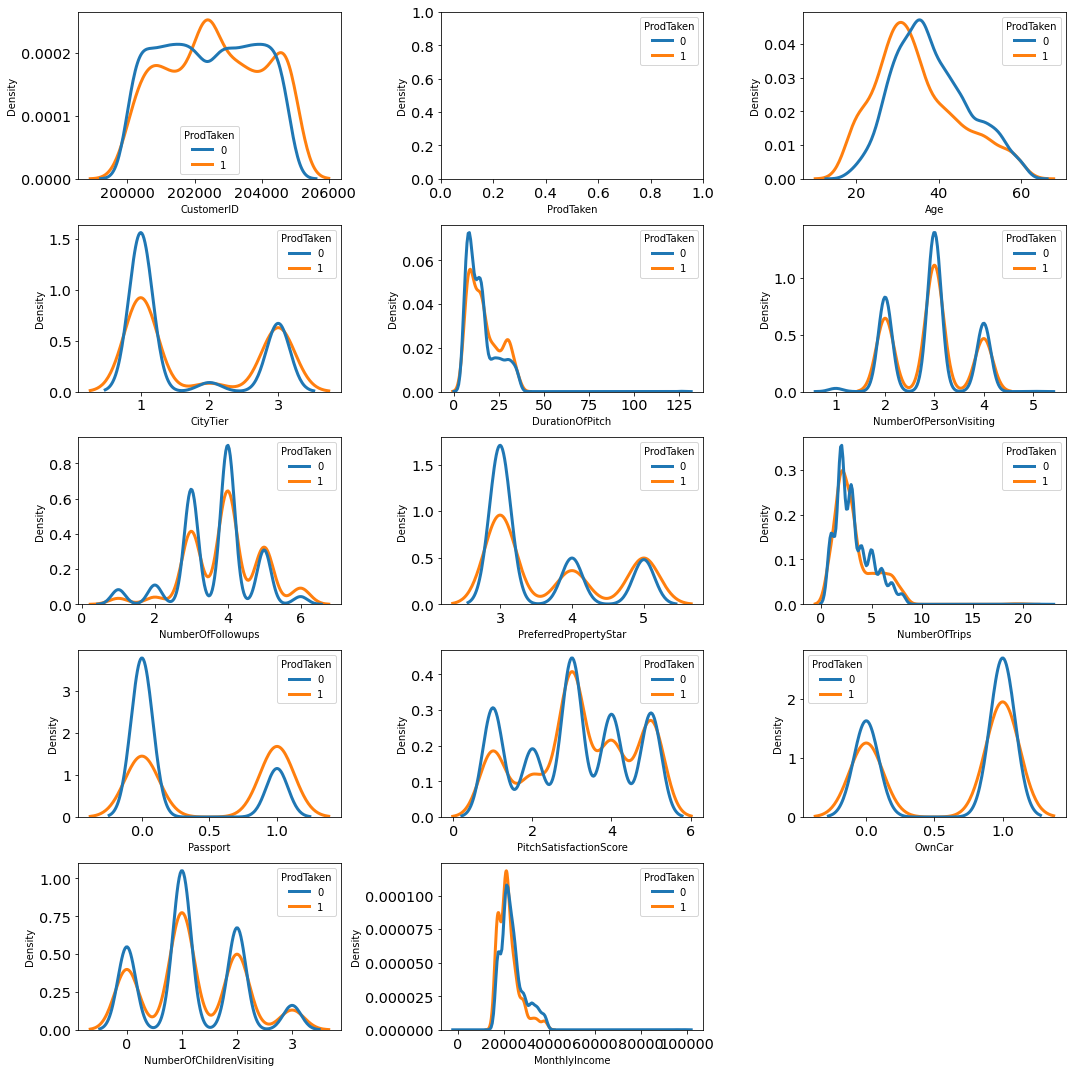

In [13]:
# Distribusi variabel numerikal terhadap variabel target (ProdTaken)
features = nums
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)//4, i+1)
    sns.kdeplot(x=df[features[i]], hue=df['ProdTaken'], common_norm=False, palette=["C0", "C1"])
    plt.xlabel(features[i])
    plt.tight_layout()
plt.savefig("numerik plot.jpg", dpi=150)

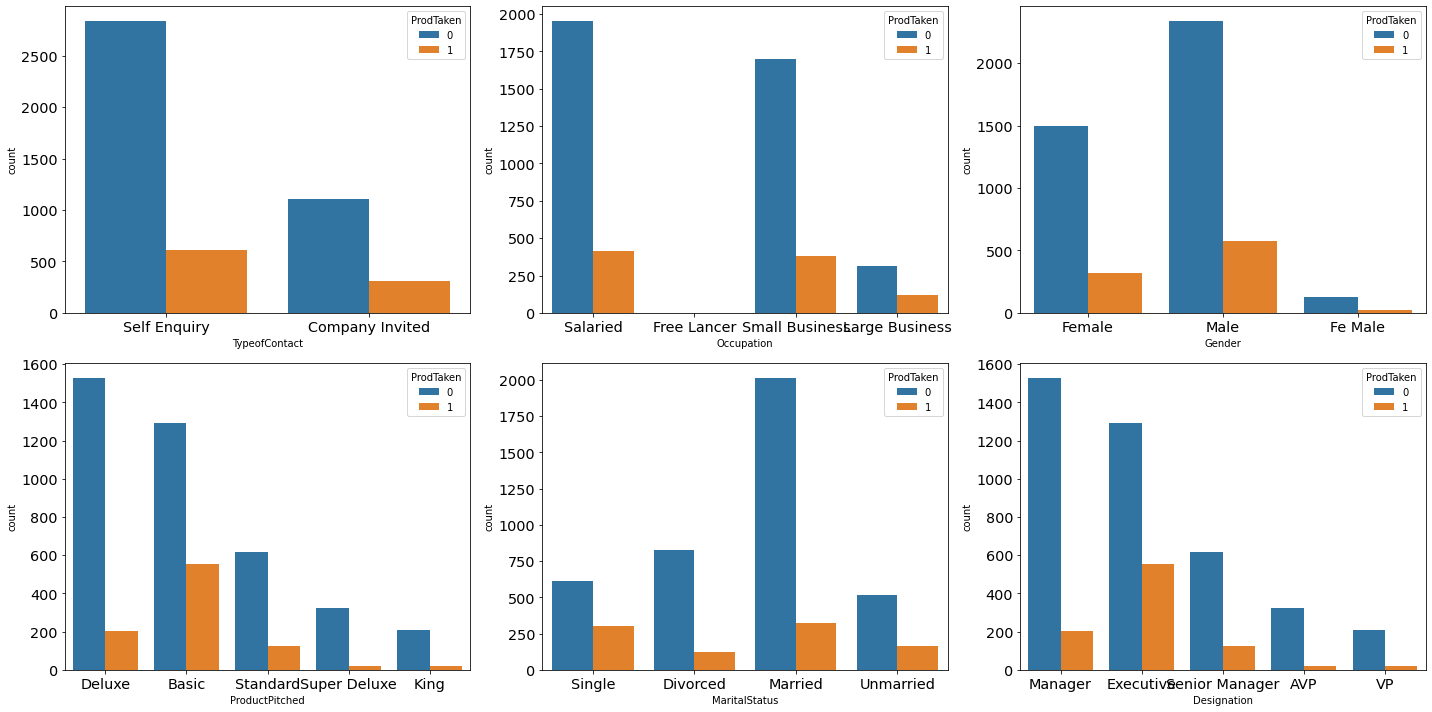

In [14]:
# Count plot variabel kategorikal terhadap variabel target (ProdTaken)
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats[i]], hue=df['ProdTaken'], palette=["C0", "C1"], orient='v')
    plt.tight_layout()
plt.savefig("count plot.jpg", dpi=150)

## **Multivariate Analysis** ##

In [15]:
# Pengecekan korelasi data
df.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


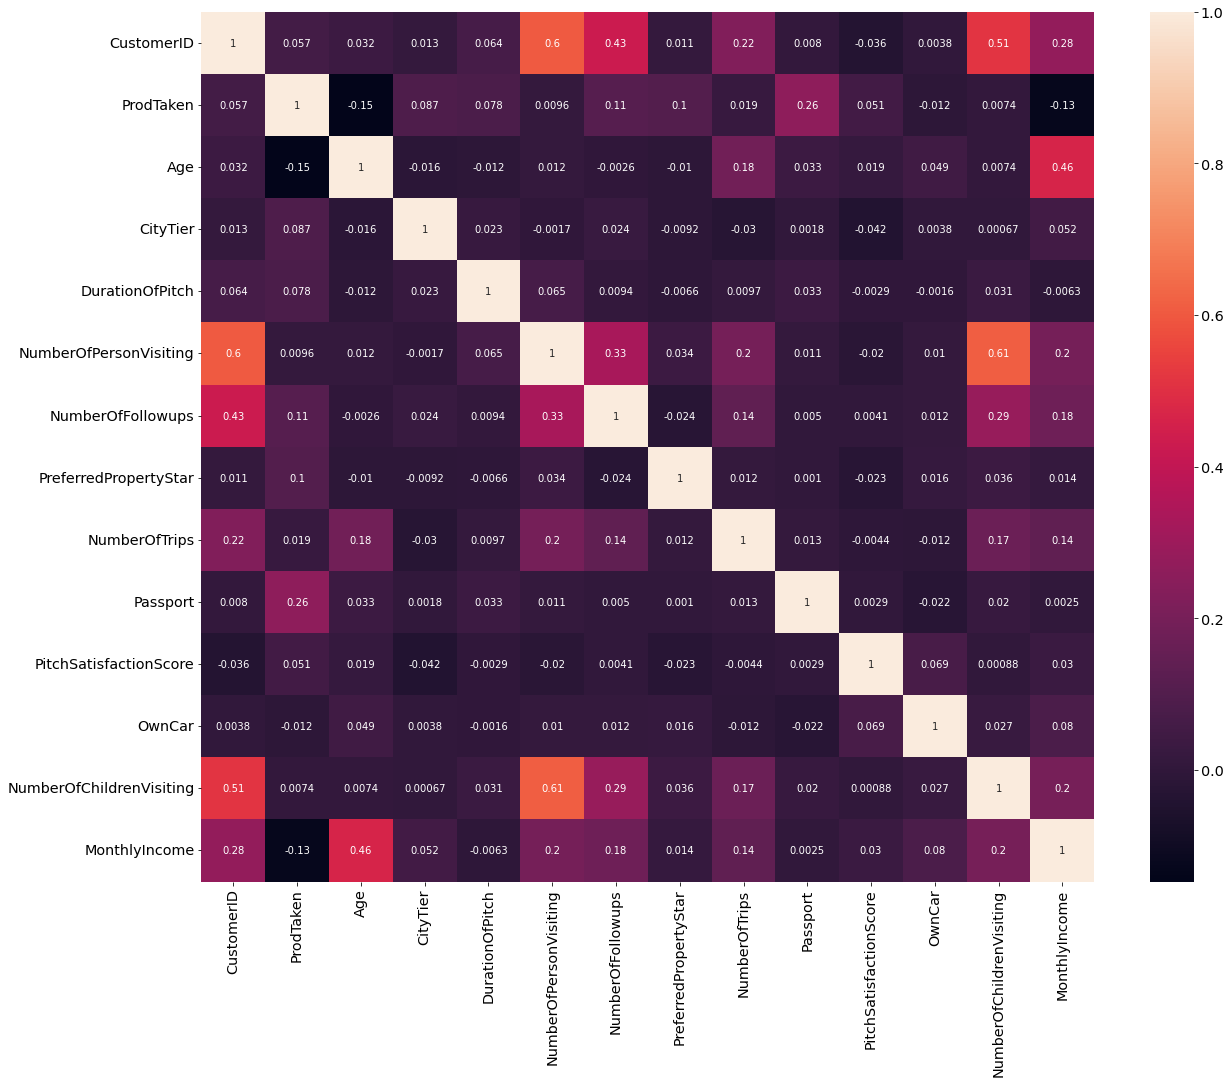

In [16]:
# Melihat korelasi antar variabel menggunakan heatmap
plt.figure(figsize=(20,16))
svm = sns.heatmap(df.corr(),annot=True)
plt.show()
figure = svm.get_figure()    
figure.savefig("heatmap.jpg", dpi=150)

**Hasil observasi:**
1. Tidak ada fitur yang memiliki korelasi kuat dengan target (>0,7), tetapi ada beberapa fitur yang dapat dijadikan pertimbangan yaitu `Passport` (0,23), `CityTier` (0,11),  `NumberOfFollowups` (0,13), `Age` (-0,18), dan `MonthlyIncome` (-0,14).

2. Fitur `MonthlyIncome` memiliki korelasi yang cukup dengan `Age` yaitu sebesar (0,5).  Fitur `NumberOfChildrenVisiting` juga memiliki korelasi yang cukup dengan `NumberOfPersonVisiting` tetapi keduanya masih belum bisa dikatakan redundan karena korelasinya < 0,7.

## **Business Insight** ##

In [17]:
# Melihat insight dari `CustomerID`, `Passport`, dan `ProdTaken`
viz_1 = df.groupby(['Passport', 'ProdTaken'])['CustomerID'].count().reset_index()
viz_1

,Passport,ProdTaken,CustomerID
0,0,0,3040
1,0,1,426
2,1,0,928
3,1,1,494


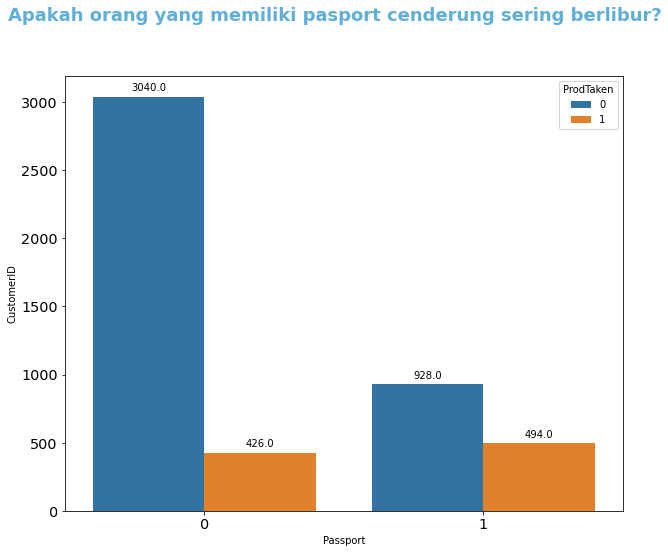

In [18]:
plt.figure(figsize=(10,8))
plt.suptitle('Apakah orang yang memiliki pasport cenderung sering berlibur?',fontsize=18, y=1, color = '#5fafd7', weight = 'bold')

splot=sns.barplot(x='Passport', y='CustomerID', data=viz_1, hue='ProdTaken')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.savefig("viz 1.jpg", dpi=150)

**Insight 1:**
Tidak ada perbedaan yang signifikan dari jumlah user yang memiliki paspor dengan pembelian paket liburan. Hal ini kemungkinan karena user yang tidak memiliki paspor tetap bisa membeli paket liburan dengan destinasi domestik sehinga punya atau tidak punya paspor tidak begitu berpengaruh.

In [19]:
# Melihat insight dari `Designation`, `Passport`, dan `ProdTaken`
viz_2 = df.groupby(['Designation', 'ProdTaken'])['CustomerID'].count().reset_index()
viz_2

,Designation,ProdTaken,CustomerID
0,AVP,0,322
1,AVP,1,20
2,Executive,0,1290
3,Executive,1,552
4,Manager,0,1528
5,Manager,1,204
6,Senior Manager,0,618
7,Senior Manager,1,124
8,VP,0,210
9,VP,1,20


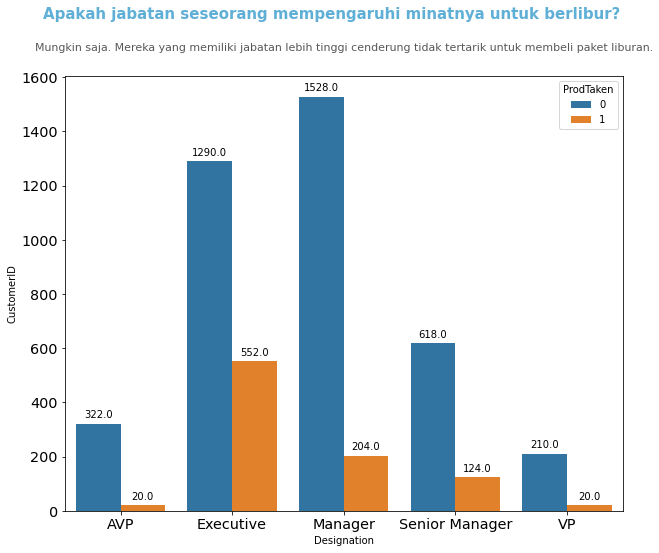

In [20]:
plt.figure(figsize=(10,8))
plt.suptitle('Apakah jabatan seseorang mempengaruhi minatnya untuk berlibur? ',fontsize=15, y=1, color = '#5fafd7', weight = 'bold')
plt.title('Mungkin saja. Mereka yang memiliki jabatan lebih tinggi cenderung tidak tertarik untuk membeli paket liburan.',fontsize=11,pad=25, color='#585858')

splot=sns.barplot(x='Designation', y='CustomerID', data=viz_2, hue='ProdTaken')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.savefig("viz 2.jpg", dpi=150)

**Insight 2:**
User dengan jabatan yang lebih  rendah cenderung membeli paket liburan. Oleh karena itu promosi dapat diberikan kepada mereka dengan jabatan-jabatan tersebut.

In [21]:
# Melihat insight dari `CityTier`, `Passport`, dan `ProdTaken`
viz_3 = df.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index()
viz_3

,CityTier,ProdTaken,CustomerID
0,1,0,2670
1,1,1,520
2,2,0,152
3,2,1,46
4,3,0,1146
5,3,1,354


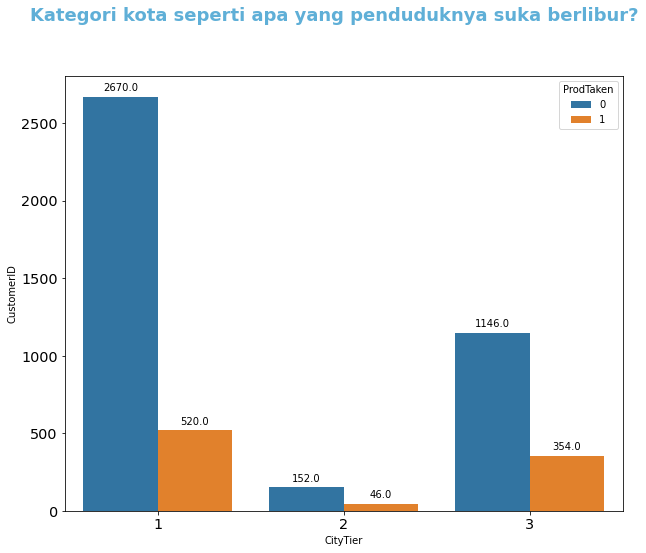

In [22]:
plt.figure(figsize=(10,8))
plt.suptitle('Kategori kota seperti apa yang penduduknya suka berlibur?',fontsize=18, y=1, color = '#5fafd7', weight = 'bold')

splot=sns.barplot(x='CityTier', y='CustomerID', data=viz_3, hue='ProdTaken')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.savefig("viz 3.jpg", dpi=150)

**Insight 3:**
User yang tinggal di kota dengan kategori 1 dan 3 lebih banyak membeli paket liburan dibandingkan user yang tinggal di kota dengan kategori 2. Sehingga user yang tinggal di kedua kota tersebut dapat diberikan penawaran khusus.

**Rekomendasi bisnis berdasarkan ketiga insight tersebut:**

1. User yang memiliki paspor, tinggal di kota dengan kategori 1/3 dan memiliki jabatan setidaknya eksekutif: Promosi paket liburan destinasi dalam dan luar negeri.

2. User yang tidak memiliki paspor, tinggal di kota dengan kategori 1/3 dan memiliki jabatan setidaknya  eksekutif: Promosi paket liburan destinasi dalam negeri.


## **Data Pre-processing** ##

**Menindaklanjuti hasil observasi pada stage 1, ada 2 hal yang perlu dilakukan terlebih dahulu, yaitu mengganti nilai fe male pada kolom `Gender` menjadi female serta mengelompokkan unmarried dan single ke dalam kategori single pada kolom `MaritalStatus`**

In [23]:
# Mengubah fe male menjadi female
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.rename_categories({'Fe Male': 'female'})
df['Gender'] = df['Gender'].str.lower()
df['Gender'].value_counts()

male      2916
female    1972
Name: Gender, dtype: int64

In [24]:
# Mengelompokkan unmarried dan single ke dalam kategori single
df['MaritalStatus'] = df['MaritalStatus'].replace(['Unmarried'], 'Single')
df['MaritalStatus'].value_counts()

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

### **Feature Selection** ###

Semua fitur kecuali `CustomerID` akan digunakan untuk modelling karena dirasa relevan

### **Feature Engineering** ###

In [25]:
# Membuang fitur yang tidak digunakan
df.drop(columns=['CustomerID'],inplace = True)

### **Handling Missing Values** ###

In [26]:
# Melihat kolom-kolom yang masih mempunyai missing values
df.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [27]:
# Melihat persentase missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

Berdasarkan persentase dari missing values di atas, diputuskan untuk membuang kolom dengan missing values <1% dan menangani kolom lainnya sesuai dengan distribusinya.

In [28]:
# Menghapus baris yang mengandung missing values < 1%
df = df.dropna(subset=['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar'])

skew Age 0.3841473980844322


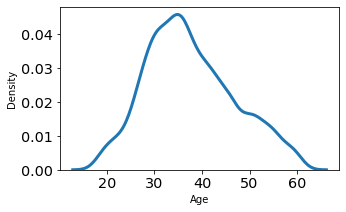

In [29]:
# Melihat distribusi dari kolom 'Age' untuk menentukan cara penanganannya
print("skew Age", df['Age'].skew())
plt.figure(figsize=(5, 3))
sns.kdeplot( x='Age', data=df)
plt.savefig("kde age.jpg", dpi=150)

skew MonthlyIncome 1.5469297877484347


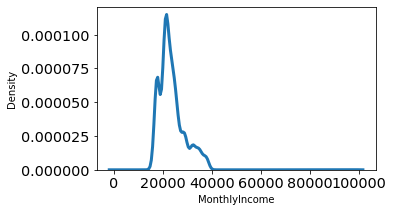

In [30]:
# Melihat distribusi dari kolom 'MonthlyIncome' untuk menentukan cara penanganannya
print("skew MonthlyIncome", df['MonthlyIncome'].skew())
plt.figure(figsize=(5, 3))
sns.kdeplot( x='MonthlyIncome', data=df)
plt.savefig("kde income.jpg", dpi=150)

In [31]:
# Mengisi missing values pada kolom 'Age' dan 'DurationOfPitch' dengan mean karena distribusinya mendekati normal, dan mengisi nilai median untuk kolom 'MonthlyIncome' karena skew positif
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [32]:
# Mengisi missing values pada kolom 'NumberOfTrips', 'NumberOfChildrenVisiting' dengan nilai modus
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0], inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

In [33]:
# Memeriksa apakah masih ada kolom dengan missing values
df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### **Handling Duplicated Data** ###

In [34]:
# Pengecekan data duplikat
df.duplicated().sum()

140

In [35]:
# Menghapus data duplikat karena jumlahnya sedikit
df.drop_duplicates(inplace = True)

In [36]:
# Pengecekan data duplikat kembali untuk memastikan sudah terhapus semua
df.duplicated().sum()

0

In [37]:
# Melihat jumlah baris setelah menghapus data duplikat
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4652 non-null   int64  
 1   Age                       4652 non-null   float64
 2   TypeofContact             4652 non-null   object 
 3   CityTier                  4652 non-null   int64  
 4   DurationOfPitch           4652 non-null   float64
 5   Occupation                4652 non-null   object 
 6   Gender                    4652 non-null   object 
 7   NumberOfPersonVisiting    4652 non-null   int64  
 8   NumberOfFollowups         4652 non-null   float64
 9   ProductPitched            4652 non-null   object 
 10  PreferredPropertyStar     4652 non-null   float64
 11  MaritalStatus             4652 non-null   object 
 12  NumberOfTrips             4652 non-null   float64
 13  Passport                  4652 non-null   int64  
 14  PitchSat

### **Handling Outlier** ###

Berdasarkan observasi sebelumnya terdapat beberapa kolom yang memiliki nilai outlier, antara lain `DurationOfPitch`, `NumberOfTrips`, `MonthlyIncome`, `NumberOfFollowups`, `NumberOfPersonVisiting`.

In [38]:
# Memeriksa persebaran outlier
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']].describe())


Persebaran data sebelum ditangani Outlier: 
       DurationOfPitch  NumberOfTrips  MonthlyIncome  NumberOfFollowups  \
count      4652.000000    4652.000000    4652.000000        4652.000000   
mean         15.531440       3.196475   23488.410684           3.702709   
std           8.349354       1.829570    5083.135903           1.005237   
min           5.000000       1.000000    1000.000000           1.000000   
25%           9.000000       2.000000   20561.000000           3.000000   
50%          14.000000       3.000000   22368.500000           4.000000   
75%          19.000000       4.000000   25379.750000           4.000000   
max         127.000000      22.000000   98678.000000           6.000000   

       NumberOfPersonVisiting  
count              4652.00000  
mean                  2.91552  
std                   0.72279  
min                   1.00000  
25%                   2.00000  
50%                   3.00000  
75%                   3.00000  
max                   5

In [39]:
# Menangani outlier dengan metode IQR
Q1 = (df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']]).quantile(0.25)
Q3 = (df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']]).quantile(0.75)

IQR = Q3 - Q1
print('Nilai IQR dari masing-masing Variable adalah: ')
print(IQR)

maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('Nilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups', 'NumberOfPersonVisiting']].describe())

Nilai IQR dari masing-masing Variable adalah: 
DurationOfPitch             10.00
NumberOfTrips                2.00
MonthlyIncome             4818.75
NumberOfFollowups            1.00
NumberOfPersonVisiting       1.00
dtype: float64
Nilai Maximum dari masing-masing Variable adalah: 
DurationOfPitch              34.000
NumberOfTrips                 7.000
MonthlyIncome             32607.875
NumberOfFollowups             5.500
NumberOfPersonVisiting        4.500
dtype: float64
Nilai Minimum dari masing-masing Variable adalah: 
DurationOfPitch              -6.000
NumberOfTrips                -1.000
MonthlyIncome             13332.875
NumberOfFollowups             1.500
NumberOfPersonVisiting        0.500
dtype: float64

Persebaran data setelah ditangani Outlier: 
       DurationOfPitch  NumberOfTrips  MonthlyIncome  NumberOfFollowups  \
count      4652.000000    4652.000000    4652.000000        4652.000000   
mean         15.460718       3.163156   23269.338860           3.707223   
std   

### **Feature Encoding** ###

In [40]:
# Melihat values dari fitur-fitur kategorikal
cats = ['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Designation', 'Gender']
df[cats].describe()

,TypeofContact,Occupation,ProductPitched,MaritalStatus,Designation,Gender
count,4652,4652,4652,4652,4652,4652
unique,2,4,5,3,5,2
top,Self Enquiry,Salaried,Basic,Married,Executive,male
freq,3299,2253,1776,2232,1776,2778


In [41]:
# Melihat values dari kolom-kolom kategorikal
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3299
Company Invited    1353
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2253
Small Business    1977
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom ProductPitched:
Basic           1776
Deluxe          1637
Standard         713
Super Deluxe     324
King             202
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married     2232
Single      1487
Divorced     933
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1776
Manager           1637
Senior Manager     713
AVP                324
VP                 202
Name: Designation, dtype: int64

Value count kolom Gender:
male      2778
female    1874
Name: Gender, dtype: int64



In [42]:
# Melihat values dari kolom-kolom kategorikal
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3299
Company Invited    1353
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2253
Small Business    1977
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom ProductPitched:
Basic           1776
Deluxe          1637
Standard         713
Super Deluxe     324
King             202
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married     2232
Single      1487
Divorced     933
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1776
Manager           1637
Senior Manager     713
AVP                324
VP                 202
Name: Designation, dtype: int64

Value count kolom Gender:
male      2778
female    1874
Name: Gender, dtype: int64



In [43]:
# Label encoding
mapping_ProductPitched = {
    'Basic' : 0,
    'Standard' : 1,
    'Deluxe' : 2,
    'Super Deluxe' : 3,
    'King' : 4   
}

mapping_Designation = {
    'Executive' : 0,
    'Manager' : 1,
    'Senior Manager' : 2,
    'AVP' : 3,
    'VP' : 4   
}

df['ProductPitched'] = df['ProductPitched'].map(mapping_ProductPitched)
df['Designation'] = df['Designation'].map(mapping_Designation)

In [44]:
# One hot encoding
for cat in ['TypeofContact', 'Occupation', 'MaritalStatus', 'Gender']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [45]:
# Menghapus kolom yang outdated setelah feature encoding
df = df.drop(columns= ['TypeofContact', 'Occupation', 'MaritalStatus', 'Gender'])

In [46]:
# Pengecekan kolom-kolom setelah feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4652 non-null   int64  
 1   Age                            4652 non-null   float64
 2   CityTier                       4652 non-null   int64  
 3   DurationOfPitch                4652 non-null   float64
 4   NumberOfPersonVisiting         4652 non-null   float64
 5   NumberOfFollowups              4652 non-null   float64
 6   ProductPitched                 4652 non-null   int64  
 7   PreferredPropertyStar          4652 non-null   float64
 8   NumberOfTrips                  4652 non-null   float64
 9   Passport                       4652 non-null   int64  
 10  PitchSatisfactionScore         4652 non-null   int64  
 11  OwnCar                         4652 non-null   int64  
 12  NumberOfChildrenVisiting       4652 non-null   f

## **Split data training & testing** ##

In [47]:
# Split Feature and Label
X = df.drop(columns=['ProdTaken'])
y = df['ProdTaken'] # target / label

In [48]:
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **Feature transformation** ##

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X.columns)

In [50]:
# Melihat jumlah prodtaken di data train
print(pd.Series(y_train).value_counts())

0    2632
1     624
Name: ProdTaken, dtype: int64


In [51]:
# Melihat jumlah prodtaken di data test
print(pd.Series(y_test).value_counts())

0    1143
1     253
Name: ProdTaken, dtype: int64


In [52]:
# Handle imbalance data train dengan metode SMOTE
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    2632
1    2632
Name: ProdTaken, dtype: int64


## **Logistic regression** ##

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_over_SMOTE, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_over_SMOTE, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_over_SMOTE, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_over_SMOTE, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))  
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [55]:
# modelling dengan parameter default
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(lr)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.76
Precision (Train Set): 0.75
Precision (Test Set): 0.41
Recall (Train Set): 0.75
Recall (Test Set): 0.81
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.55
AUC (test-proba): 0.83
AUC (train-proba): 0.81


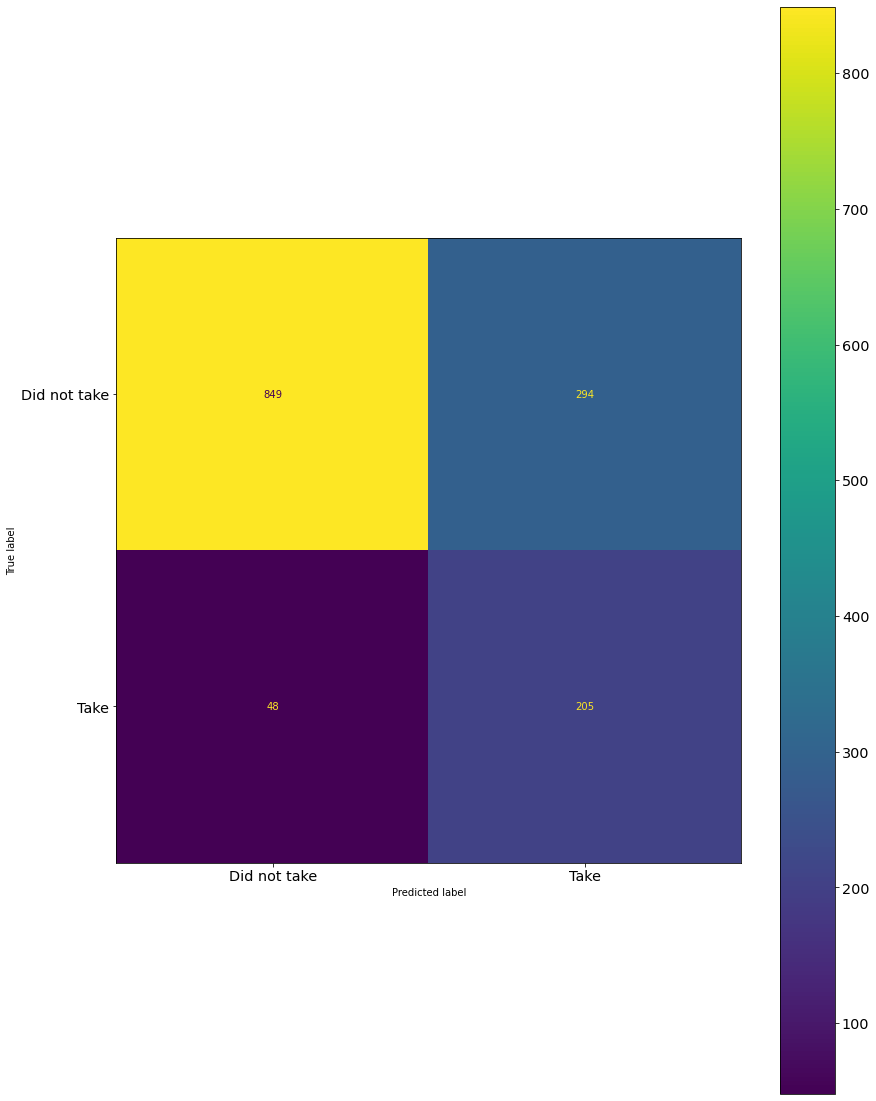

In [56]:
# Confusion matrix dengan parameter default
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [57]:
# Tuning awal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
tuning_1 = GridSearchCV(logres, hyperparameters, cv=5, scoring='f1')

# Fitting Model & Evaluation
tuning_1.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = tuning_1.predict(X_test)
eval_classification(tuning_1)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.76
Precision (Train Set): 0.75
Precision (Test Set): 0.41
Recall (Train Set): 0.75
Recall (Test Set): 0.79
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.54
AUC (test-proba): 0.83
AUC (train-proba): 0.81


In [58]:
# melihat hyperparameter terbaik dari hasil tuning awal
show_best_hyperparameter(tuning_1)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [59]:
# Iterasi ulang dengan hasil hyperparameter tuning
lr_tuned = LogisticRegression(random_state=42,
                              C=0.002,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              )
lr_tuned.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = lr_tuned.predict(X_test)
eval_classification(lr_tuned)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.76
Precision (Train Set): 0.75
Precision (Test Set): 0.41
Recall (Train Set): 0.75
Recall (Test Set): 0.79
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.54
AUC (test-proba): 0.83
AUC (train-proba): 0.81


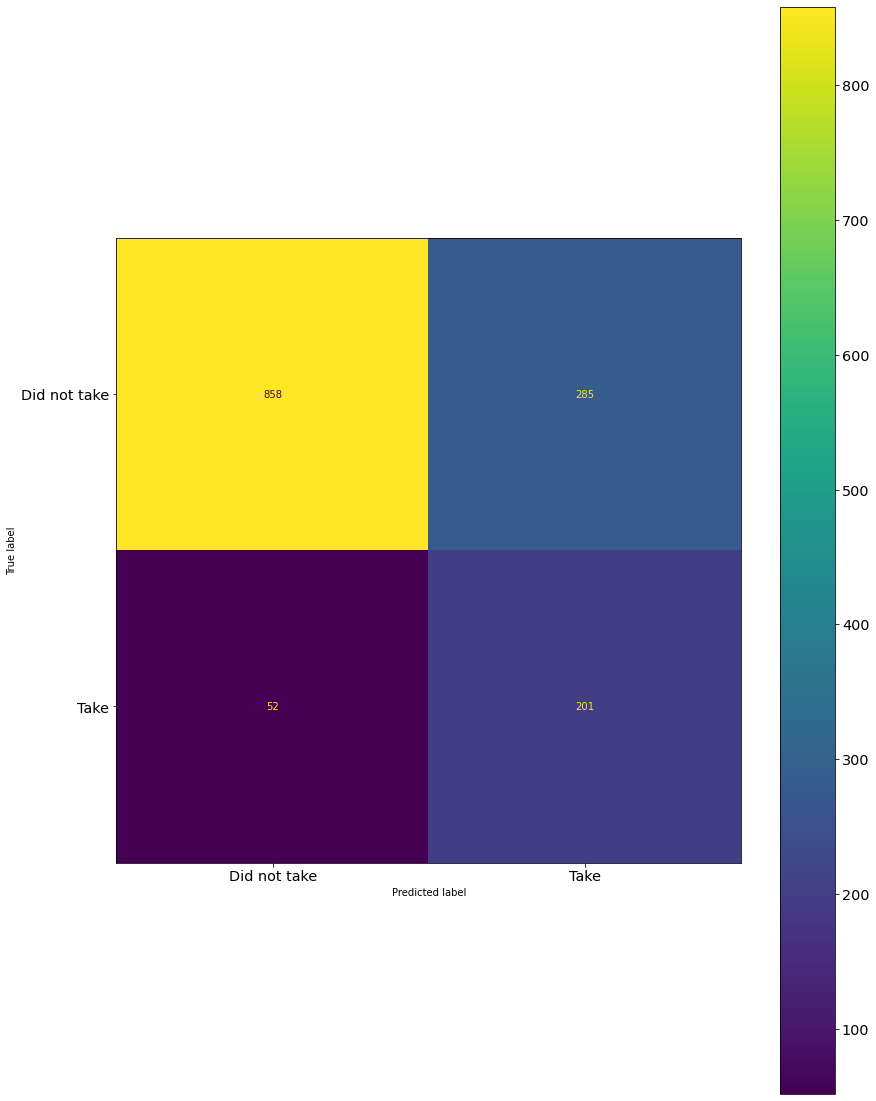

In [60]:
# confusion matrix setelah tuning
plot_confusion_matrix(lr_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

## **Decision Tree** ##

In [61]:
# melakukan modelling dengan parameter default
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.87
Precision (Train Set): 1.00
Precision (Test Set): 0.62
Recall (Train Set): 1.00
Recall (Test Set): 0.69
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.66
AUC (test-proba): 0.80
AUC (train-proba): 1.00


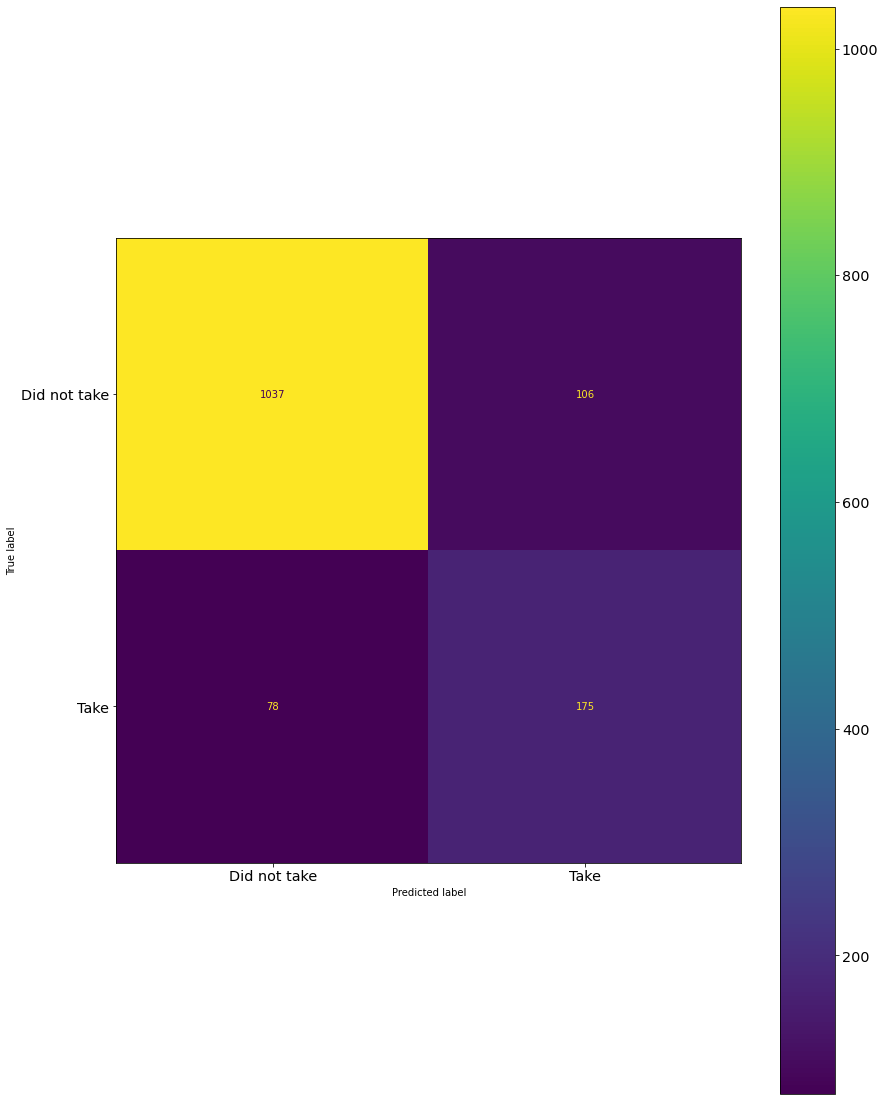

In [62]:
# confusion matrix sebelum dituning
plot_confusion_matrix(dt, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [63]:
# tuning awal
dtc=DecisionTreeClassifier(random_state=42)
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5, 7, 10], 
    'min_samples_leaf' : [1, 2, 5] 
}

from sklearn.model_selection import GridSearchCV
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5)
CV_dtc.fit(X_over_SMOTE, y_over_SMOTE)
print(CV_dtc.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [64]:
# iterasi ulang dengan best hyperparameter
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=8, 
                                   min_samples_split=7,
                                   max_features='auto',
                                   min_samples_leaf=2).fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(dt_tuned)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.80
Precision (Train Set): 0.87
Precision (Test Set): 0.45
Recall (Train Set): 0.81
Recall (Test Set): 0.55
F1-Score (Train Set): 0.84
F1-Score (Test Set): 0.50
AUC (test-proba): 0.78
AUC (train-proba): 0.92


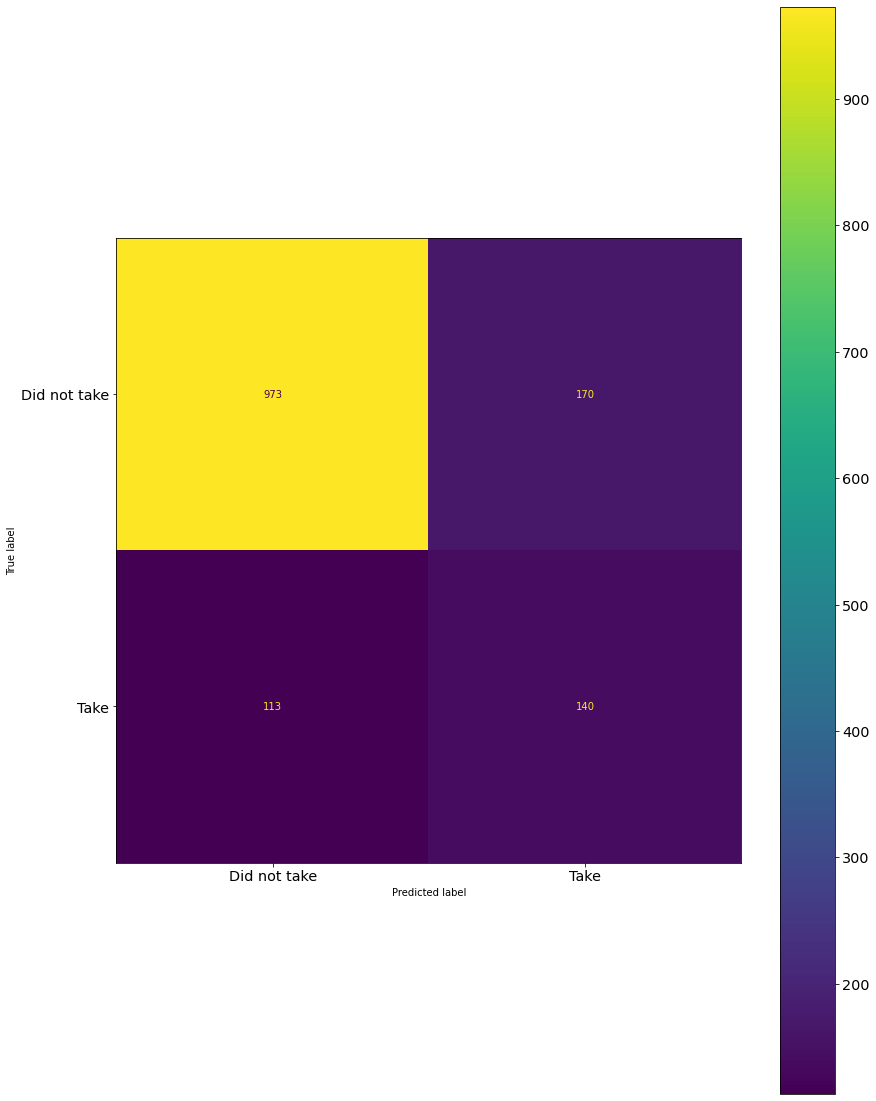

In [65]:
# confusion matrix setelah dituning
plot_confusion_matrix(dt_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

## **Random forest** ##

In [66]:
# modelling dengan parameter default
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92
Precision (Train Set): 1.00
Precision (Test Set): 0.85
Recall (Train Set): 1.00
Recall (Test Set): 0.68
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.76
AUC (test-proba): 0.96
AUC (train-proba): 1.00


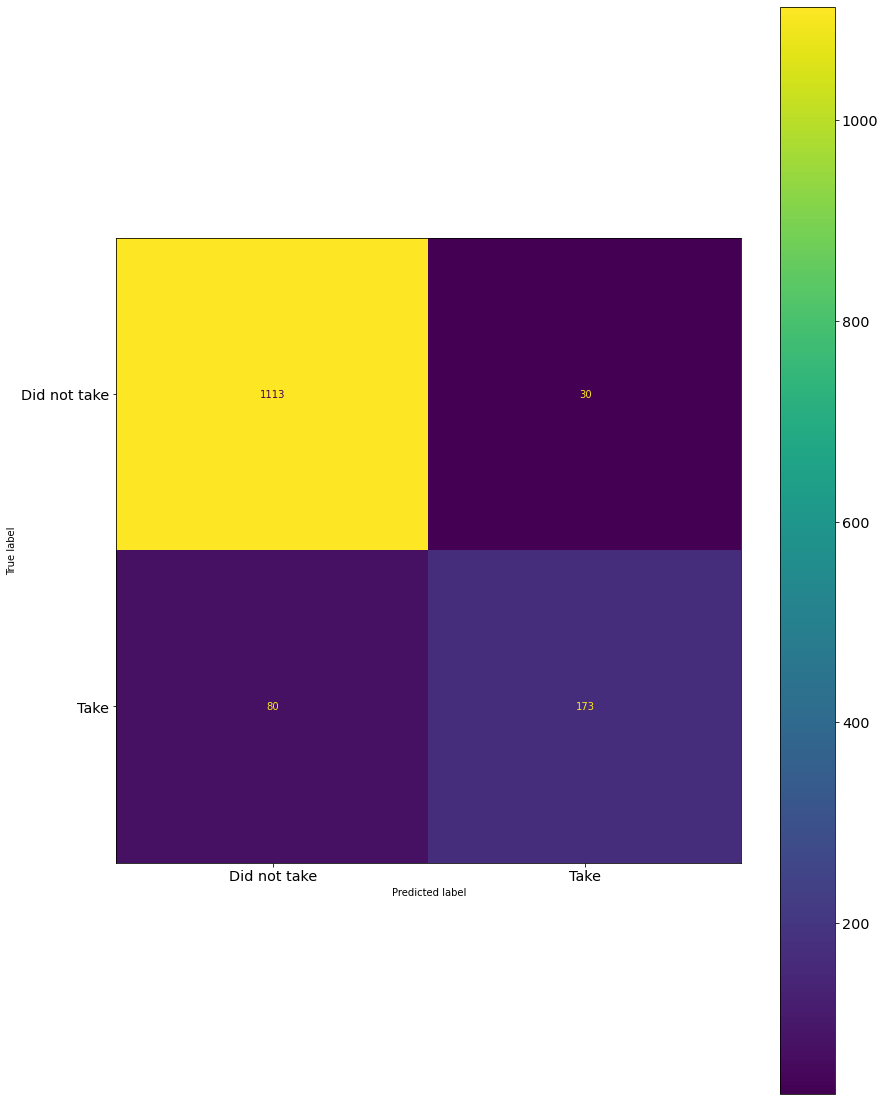

In [67]:
# confusion matrix sebelum dituning
plot_confusion_matrix(rf, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [68]:
# hyperparameter tuning
rfc=RandomForestClassifier(random_state=42)
hyperparameters = { 
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5, 7, 10], 
    'min_samples_leaf' : [1, 2, 5], 
    'n_estimators': [50, 100, 110, 120],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
CV_rfc = RandomizedSearchCV(rfc, hyperparameters, cv= 5)
CV_rfc.fit(X_over_SMOTE, y_over_SMOTE)
print(CV_rfc.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


In [69]:
# iterasi ulang dengan best hyperparametertuning
rf_tuned = RandomForestClassifier(random_state=42, 
                                   n_estimators=110, 
                                   max_depth=7, 
                                   criterion='entropy',
                                   max_features= 'log2',
                                   min_samples_split=7, 
                                   min_samples_leaf=2).fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.86
Precision (Train Set): 0.92
Precision (Test Set): 0.61
Recall (Train Set): 0.89
Recall (Test Set): 0.64
F1-Score (Train Set): 0.91
F1-Score (Test Set): 0.63
AUC (test-proba): 0.87
AUC (train-proba): 0.97


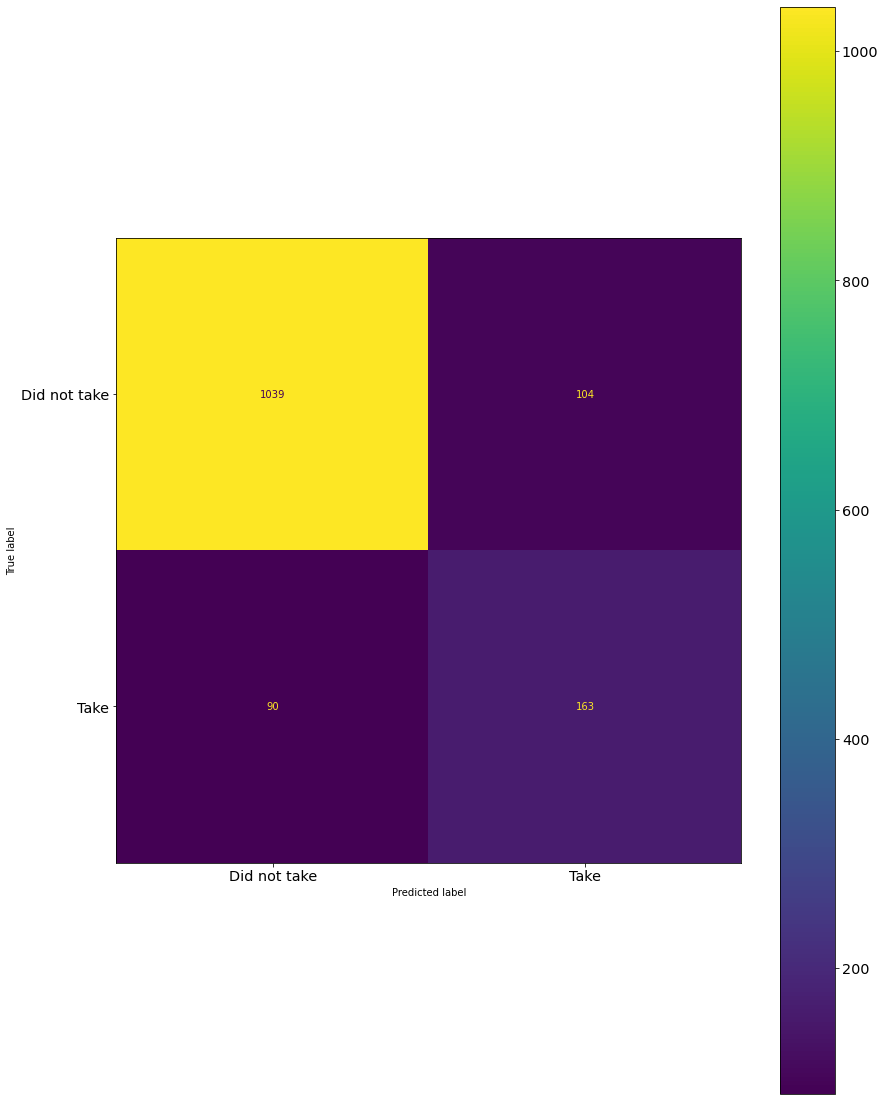

In [70]:
# melihat confusion matrix setelah dituning
plot_confusion_matrix(rf_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

## **Adaboost** ##

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = ab.predict(X_test)
eval_classification(ab)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.83
Precision (Train Set): 0.87
Precision (Test Set): 0.52
Recall (Train Set): 0.85
Recall (Test Set): 0.57
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.55
AUC (test-proba): 0.82
AUC (train-proba): 0.94


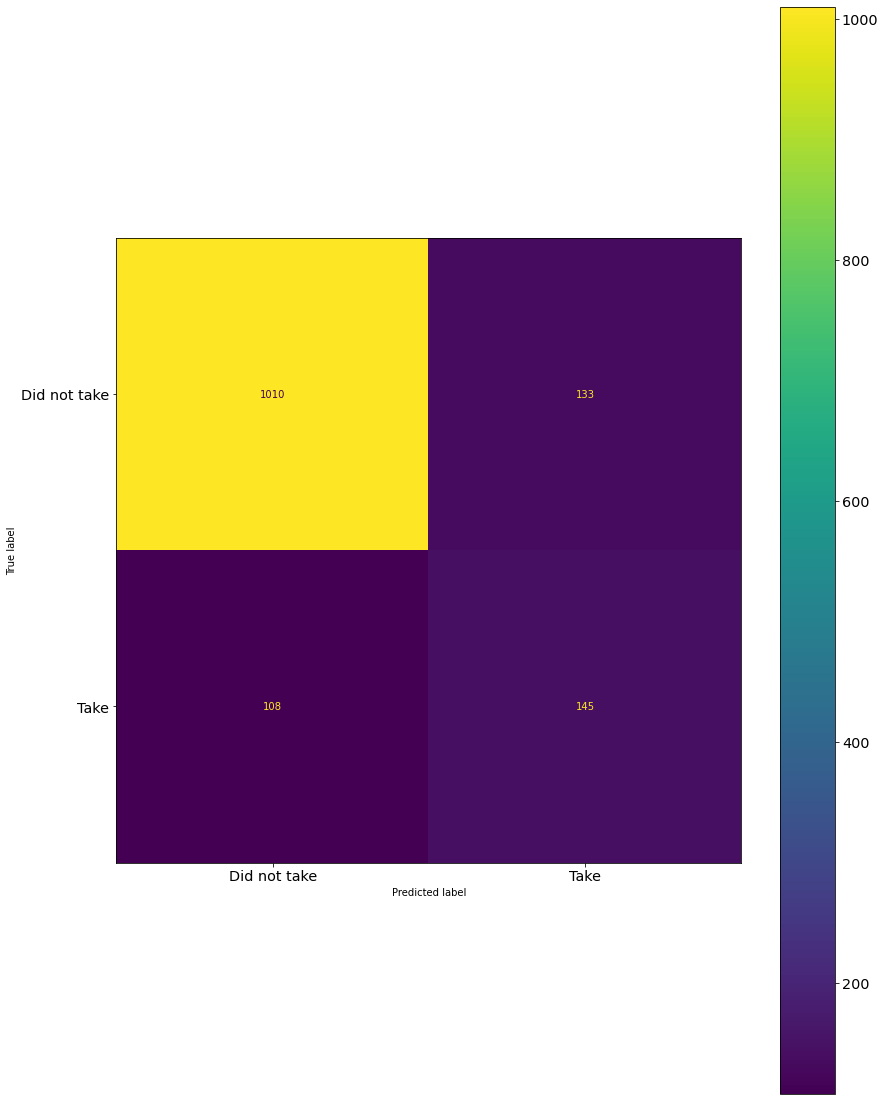

In [78]:
# melihat confusion matrix sebelum dituning
plot_confusion_matrix(ab, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

In [79]:
# tuning awal
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='accuracy')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Train Set): 0.88
Accuracy (Test Set): 0.85
Precision (Train Set): 0.91
Precision (Test Set): 0.59
Recall (Train Set): 0.85
Recall (Test Set): 0.54
F1-Score (Train Set): 0.88
F1-Score (Test Set): 0.56
AUC (test-proba): 0.84
AUC (train-proba): 0.95


In [80]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1983
Best learning_rate: 0.07462814070351759
Best algorithm: SAMME.R


In [81]:
model_tuned = AdaBoostClassifier(random_state=42, 
                               n_estimators=1398,
                               learning_rate=0.09303517587939698, 
                               algorithm = 'SAMME.R').fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(model_tuned)

Accuracy (Train Set): 0.88
Accuracy (Test Set): 0.84
Precision (Train Set): 0.91
Precision (Test Set): 0.58
Recall (Train Set): 0.85
Recall (Test Set): 0.54
F1-Score (Train Set): 0.88
F1-Score (Test Set): 0.56
AUC (test-proba): 0.84
AUC (train-proba): 0.95


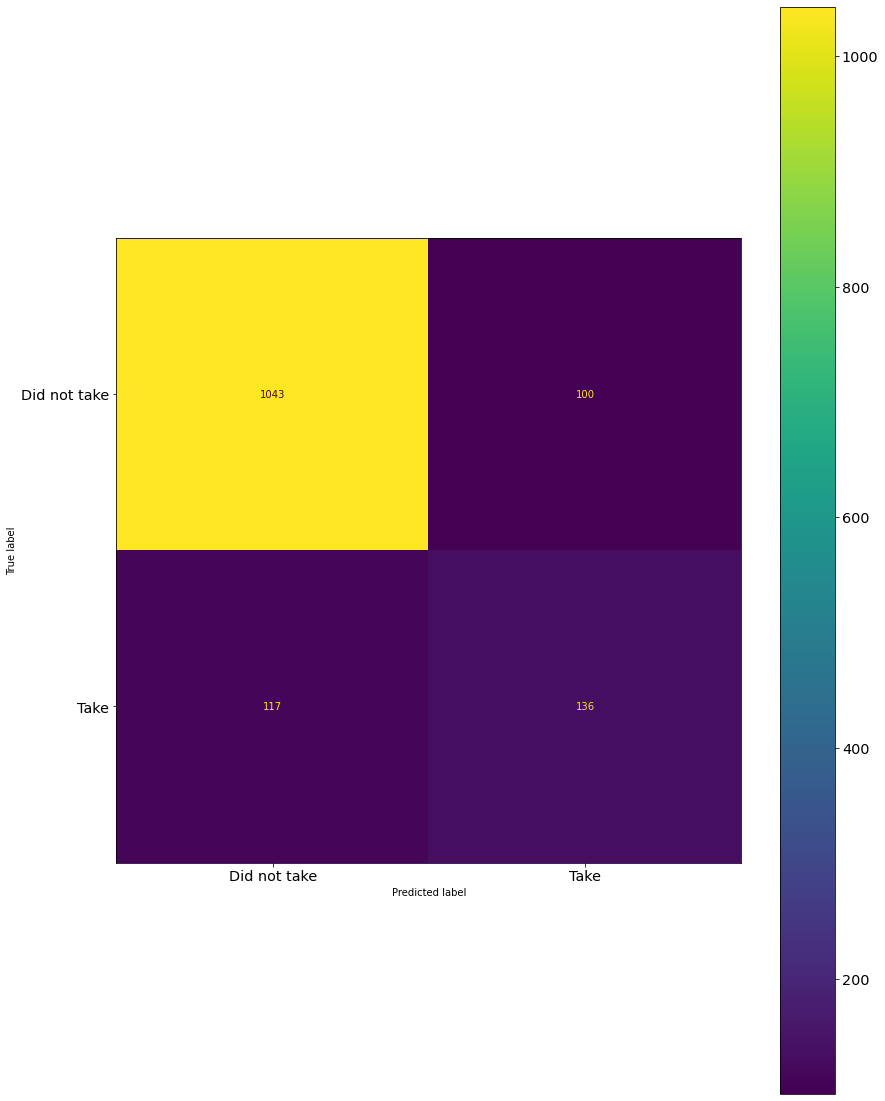

In [82]:
# melihat confusion matrix setelah dituning
plot_confusion_matrix(model_tuned, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])

## **XGBoost** ##

In [85]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(Missing=None, seed=42)
clf_xgb.fit(X_over_SMOTE, 
            y_over_SMOTE, 
            verbose=True, 
            early_stopping_rounds=10, 
            eval_metric='auc', 
            eval_set=[(X_test, y_test)])
eval_classification(clf_xgb)

[0]	validation_0-auc:0.80819
[1]	validation_0-auc:0.82899
[2]	validation_0-auc:0.82637
[3]	validation_0-auc:0.84862
[4]	validation_0-auc:0.84229
[5]	validation_0-auc:0.85201
[6]	validation_0-auc:0.86082
[7]	validation_0-auc:0.86298
[8]	validation_0-auc:0.86855
[9]	validation_0-auc:0.87191
[10]	validation_0-auc:0.87333
[11]	validation_0-auc:0.87484
[12]	validation_0-auc:0.87854
[13]	validation_0-auc:0.87966
[14]	validation_0-auc:0.88480
[15]	validation_0-auc:0.88596
[16]	validation_0-auc:0.88857
[17]	validation_0-auc:0.89240
[18]	validation_0-auc:0.89211
[19]	validation_0-auc:0.89253
[20]	validation_0-auc:0.89618
[21]	validation_0-auc:0.90363
[22]	validation_0-auc:0.90556
[23]	validation_0-auc:0.90519
[24]	validation_0-auc:0.90779
[25]	validation_0-auc:0.90699
[26]	validation_0-auc:0.90961
[27]	validation_0-auc:0.91075
[28]	validation_0-auc:0.91296
[29]	validation_0-auc:0.91211
[30]	validation_0-auc:0.91210
[31]	validation_0-auc:0.91195
[32]	validation_0-auc:0.91338
[33]	validation_0-au

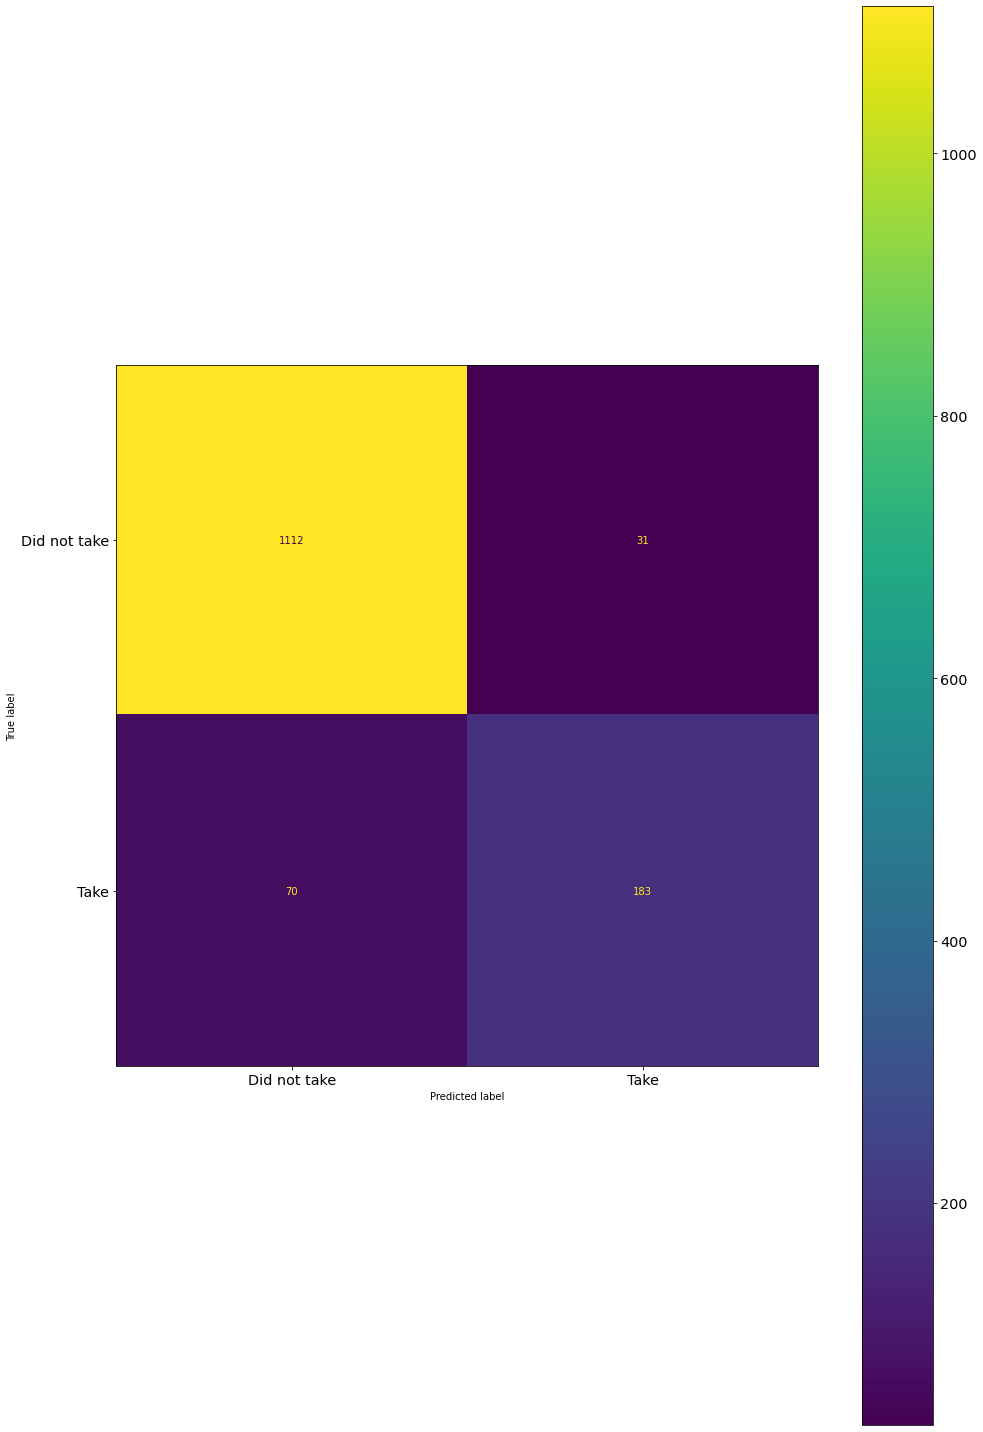

In [96]:
# melihat confusion matrix sebelum dituning
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['Did not take', 'Take'])
plt.tight_layout()
plt.savefig('xgb.jpg', dpi=200)

In [87]:
# tuning awal
clf_xgb_tuned = xgb.XGBClassifier(Missing=None, 
                            seed=42, 
                            learning_rate = 0.009,
                            n_estimators= 300,
                            max_depth=4,
                            gamma=0.5,                        
                            subsample=0.9,
                            colsample_bytree=0.7,
                            objective= 'binary:logistic',
                            tree_method='approx',
                            min_child_weight=1,
                            scale_pos_weight=1,
                            reg_lambda=1)

clf_xgb_tuned.fit(X_over_SMOTE, 
            y_over_SMOTE, 
            verbose=True, 
            early_stopping_rounds=10, 
            eval_metric='auc', 
            eval_set=[(X_test, y_test)])

eval_classification(clf_xgb_tuned)

[0]	validation_0-auc:0.74659
[1]	validation_0-auc:0.75827
[2]	validation_0-auc:0.80928
[3]	validation_0-auc:0.79986
[4]	validation_0-auc:0.81876
[5]	validation_0-auc:0.82585
[6]	validation_0-auc:0.83089
[7]	validation_0-auc:0.82969
[8]	validation_0-auc:0.82859
[9]	validation_0-auc:0.83017
[10]	validation_0-auc:0.82834
[11]	validation_0-auc:0.83004
[12]	validation_0-auc:0.83055
[13]	validation_0-auc:0.83215
[14]	validation_0-auc:0.83251
[15]	validation_0-auc:0.83273
[16]	validation_0-auc:0.83209
[17]	validation_0-auc:0.83067
[18]	validation_0-auc:0.83219
[19]	validation_0-auc:0.83335
[20]	validation_0-auc:0.83277
[21]	validation_0-auc:0.83214
[22]	validation_0-auc:0.83271
[23]	validation_0-auc:0.83211
[24]	validation_0-auc:0.83256
[25]	validation_0-auc:0.83281
[26]	validation_0-auc:0.83275
[27]	validation_0-auc:0.83425
[28]	validation_0-auc:0.83509
[29]	validation_0-auc:0.83501
[30]	validation_0-auc:0.83609
[31]	validation_0-auc:0.83616
[32]	validation_0-auc:0.83662
[33]	validation_0-au

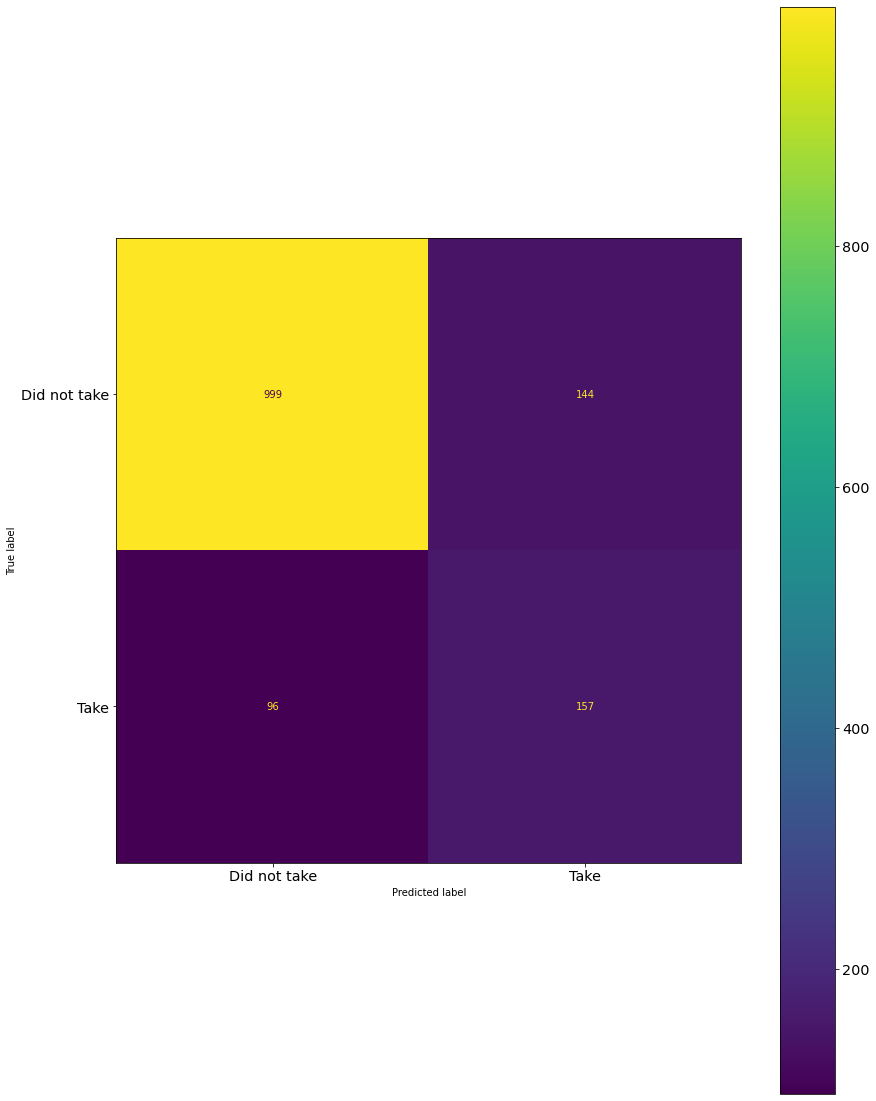

In [88]:
plot_confusion_matrix(clf_xgb_tuned, X_test, y_test, display_labels=['Did not take', 'Take'])

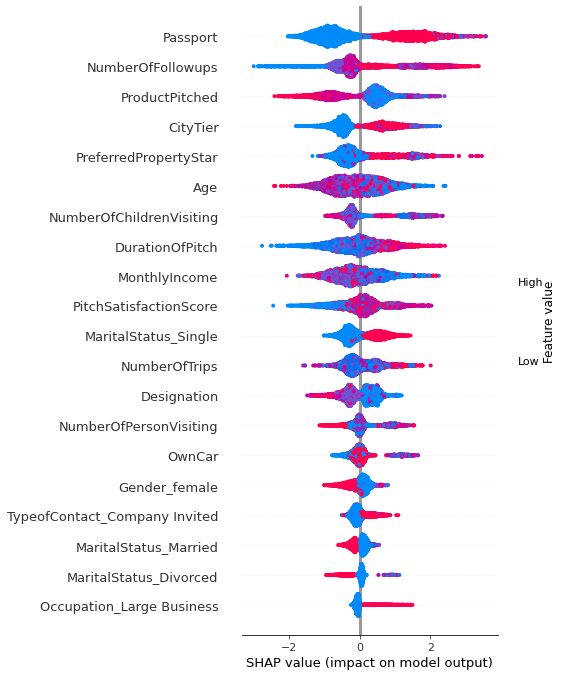

In [97]:
import shap
explainer = shap.Explainer(clf_xgb)
shap_values = explainer(X_over_SMOTE)
shap.summary_plot(shap_values, X_over_SMOTE,show=False)
plt.tight_layout()
plt.savefig('shap.jpg', dpi=200)